# Assignment 5

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from numpy.linalg import matrix_power

%config InlineBackend.figure_format = "retina"

In [70]:
np.set_printoptions(precision=5, suppress=True)

In [71]:
A = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [0, 0, 1, 0]
])

N, N = A.shape

In [72]:
A2 = matrix_power(A, 2)
A3 = matrix_power(A, 3)

In [73]:
I00 = np.ones((N, N))
I00[np.diag_indices(N)] = 0

In [74]:
nƛ = np.trace(A2 @ I00) / 2
nΔ = np.trace(A3) / 6

### Three ways to represent the transitivity

In [75]:
3 * nΔ / nƛ

0.6

In [76]:
np.trace(A3) / np.trace(A2 @ I00)

0.6

In [77]:
np.trace(A3) / np.sum(A2 * I00)

0.6

## Question 2

In [78]:
from networkx.algorithms import centrality

In [79]:
N = 8
Nhat = np.floor(N / 2)
(N - 1) / ((Nhat + 1) * (Nhat) - Nhat * ((N + 1) % 2))

0.4375

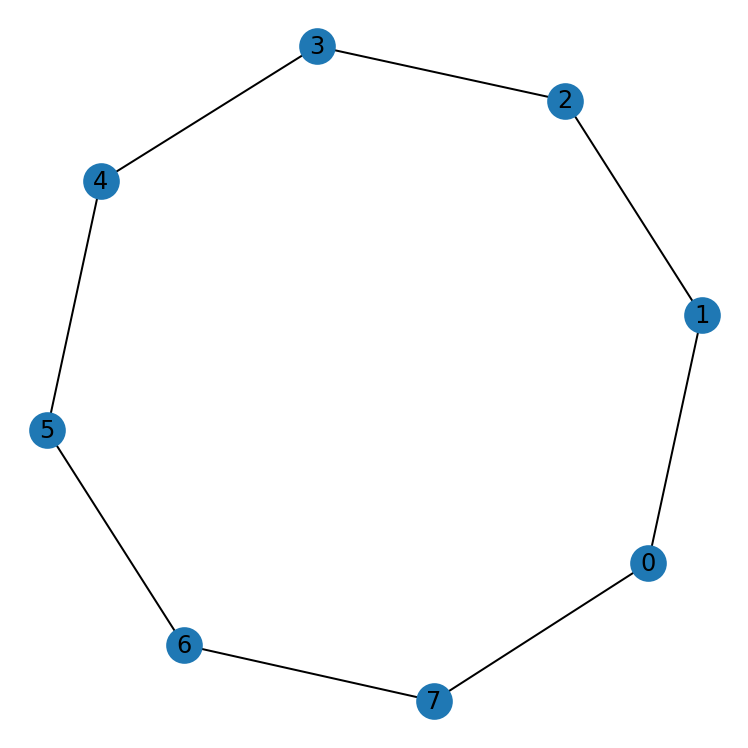

In [80]:
G = nx.Graph()
edges = [(i, (i+1) % N) for i in range(N)]
G.add_nodes_from(range(N))
G.add_edges_from(edges)

plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True)

In [81]:
centrality.closeness_centrality(G)

{0: 0.4375,
 1: 0.4375,
 2: 0.4375,
 3: 0.4375,
 4: 0.4375,
 5: 0.4375,
 6: 0.4375,
 7: 0.4375}

In [82]:
centrality.betweenness_centrality(G, normalized=False)

{0: 4.5, 1: 4.5, 2: 4.5, 3: 4.5, 4: 4.5, 5: 4.5, 6: 4.5, 7: 4.5}

In [83]:
from scipy.special import comb
import itertools

In [84]:
comb(5, 2) - (N-1)

3.0

### Question 3: Node centralities for regular graphs

In [101]:
A = np.array([
    [0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0]
])

N, N = A.shape
# Node degree of each node
m = 3

In [86]:
N = 5
A = np.ones((N, N)) - np.eye(N)
m = A.sum(axis=1)[0]

In [102]:
evals.real

array([-1.,  4., -1., -1., -1.])

In [103]:
evecs.real

array([[-0.89443,  0.44721,  0.32303, -0.03013,  0.14646],
       [ 0.22361,  0.44721,  0.72682,  0.1582 ,  0.32953],
       [ 0.22361,  0.44721, -0.34995,  0.76088, -0.48412],
       [ 0.22361,  0.44721, -0.34995, -0.44448, -0.55965],
       [ 0.22361,  0.44721, -0.34995, -0.44448,  0.56778]])

In [108]:
np.einsum("il,lj,j -> i", A, A, np.ones(N))

array([9., 9., 9., 9., 9., 9.])

In [109]:
np.linalg.matrix_power(A, 4).sum(axis=1)

array([81, 81, 81, 81, 81, 81])

In [110]:
α = 0.1
components = np.array([α ** p * np.linalg.matrix_power(A, p) for p in range(7)])
components

array([[[1.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
        [0.     , 1.     , 0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 1.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 1.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     , 1.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     , 0.     , 1.     ]],

       [[0.     , 0.1    , 0.     , 0.1    , 0.     , 0.1    ],
        [0.1    , 0.     , 0.1    , 0.     , 0.1    , 0.     ],
        [0.     , 0.1    , 0.     , 0.1    , 0.     , 0.1    ],
        [0.1    , 0.     , 0.1    , 0.     , 0.1    , 0.     ],
        [0.     , 0.1    , 0.     , 0.1    , 0.     , 0.1    ],
        [0.1    , 0.     , 0.1    , 0.     , 0.1    , 0.     ]],

       [[0.03   , 0.     , 0.03   , 0.     , 0.03   , 0.     ],
        [0.     , 0.03   , 0.     , 0.03   , 0.     , 0.03   ],
        [0.03   , 0.     , 0.03   , 0.     , 0.03   , 0.     ],
        [0.     , 0.03   , 0.     , 

In [111]:
components.sum(axis=0).sum(axis=0)

array([1.42826, 1.42826, 1.42826, 1.42826, 1.42826, 1.42826])

In [112]:
np.linalg.inv(np.eye(N) - α * A).sum(axis=0)

array([1.42857, 1.42857, 1.42857, 1.42857, 1.42857, 1.42857])

In [113]:
(np.linalg.inv(np.eye(N) - α * A) - np.eye(N)).sum(axis=0)

array([0.42857, 0.42857, 0.42857, 0.42857, 0.42857, 0.42857])

In [129]:
centrality.betweenness_centrality(G)

{0: 0.1, 1: 0.1, 2: 0.1, 3: 0.1, 4: 0.1, 5: 0.1}

In [145]:
A = np.array([
    [0, 1, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
])

G = nx.from_numpy_matrix(A)

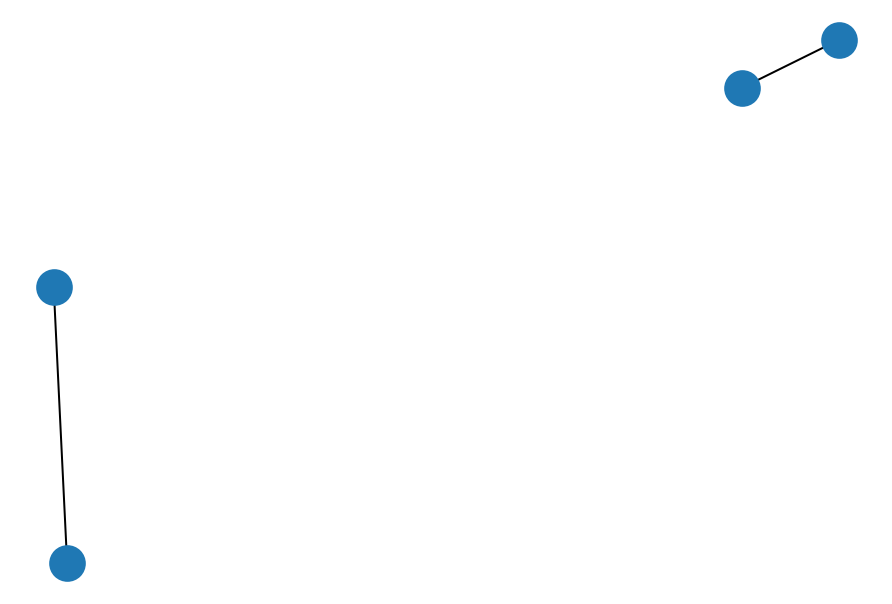

In [146]:
nx.draw(G)

In [148]:
centrality.katz_centrality(G)

{0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}